In [ ]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [ ]:
subscription_key = '58d62defda5a438aaca0df095caff62a'
face_api_url = 'https://labuser5face.cognitiveservices.azure.com/face/v1.0/detect'

# class, library, package 대문자 관례
# 지역변수, 파라메타 소문자 관례
# addr, msg 줄임말은 배제 
# 두 단어가 합쳐지면 두 번째 단어는 대문자
# 상수는 전체가 대문자 const MAx_USER = 500 

image_url = 'http://image.koreatimes.com/article/2021/05/10/20210510094734601.jpg'

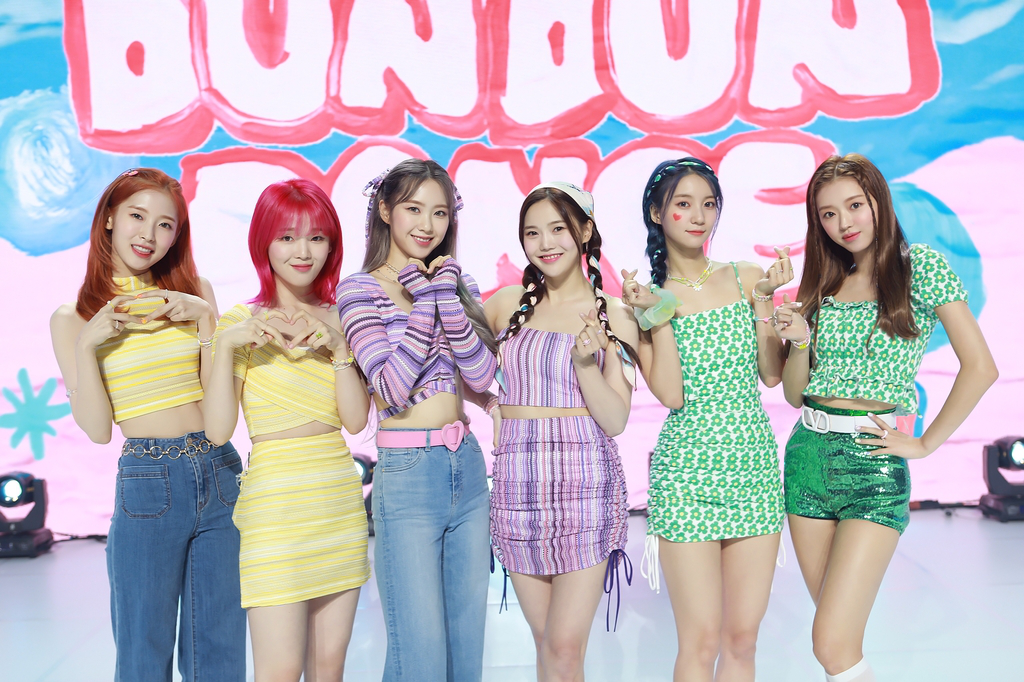

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [ ]:
params = {
    'returnFaceId' : 'false', # 각각의 인식된 사람마다 고유 아이디가 부여됨. 그 아이디의 return 여부.
    'returnFaceLandmarks': 'false', # 얼굴에 랜드마크, 눈코입의 위치 
    'returnFaceAttributes': 'Smile' # 얼굴 속성값 2가지를 받아오겠다. 
}

In [ ]:
data = {'url': image_url} 

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers,json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 203, 'left': 116, 'width': 63, 'height': 63},
  'faceAttributes': {'smile': 0.994}},
 {'faceRectangle': {'top': 193, 'left': 817, 'width': 59, 'height': 59},
  'faceAttributes': {'smile': 0.247}},
 {'faceRectangle': {'top': 222, 'left': 272, 'width': 59, 'height': 59},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 196, 'left': 396, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 189, 'left': 668, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 0.275}},
 {'faceRectangle': {'top': 215, 'left': 520, 'width': 56, 'height': 56},
  'faceAttributes': {'smile': 1.0}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(faces):
  for face in faces:
    # print(face)
    rect = face['faceRectangle']
    
    x = rect['left']
    y = rect['top']
    w = rect['width']
    h = rect['height']

    draw.rectangle(((x,y),(x+w,y+h)),outline='blue')

    face_attributes = face['faceAttributes'] 
    smile = face_attributes['smile'] 
    draw.text((x,y), str(smile) , fill='blue') # 글자 위치, 내용, 색 


In [ ]:
DrawBox(faces)

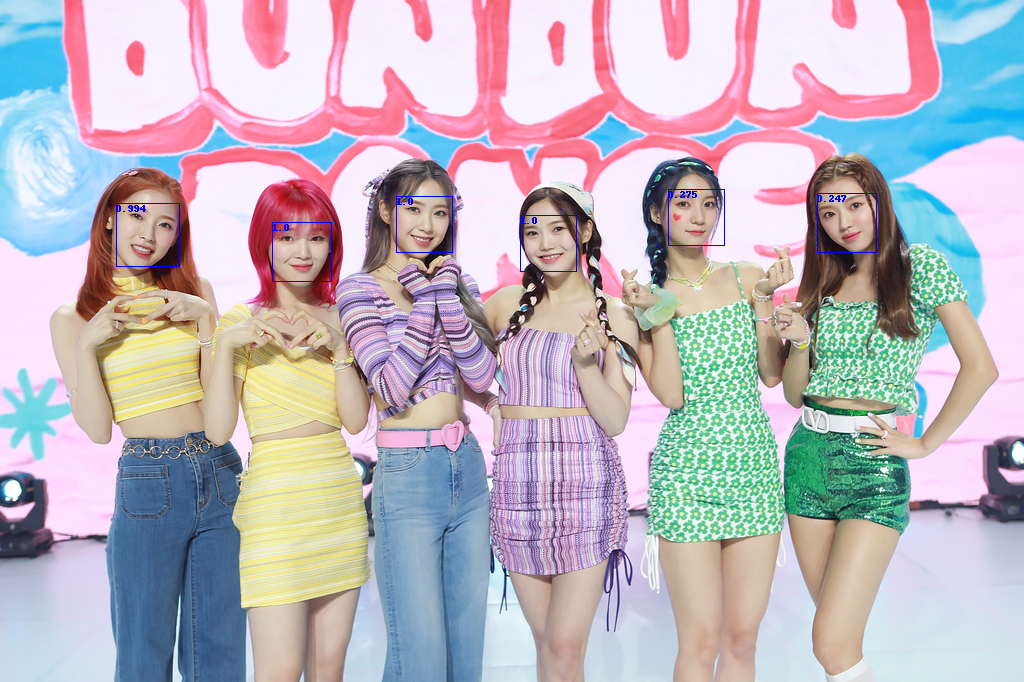

In [ ]:
image